# AE를 이용해서 creditcard 실습

## 1. **데이터 분석 및 전처리**

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:\\Users\\tbxjq\\Desktop\\가천대학교\\3학년 2학기\\딥러닝 응용\\Deep_learning_class\\data\\creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# 결측치 확인

df.isnull().values.any()

False

C:\Users\tbxjq\AppData\Local\Temp\ipykernel_20140\3859441194.py:6: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['Class'],sort=True)


Text(0, 0.5, 'Frequency')

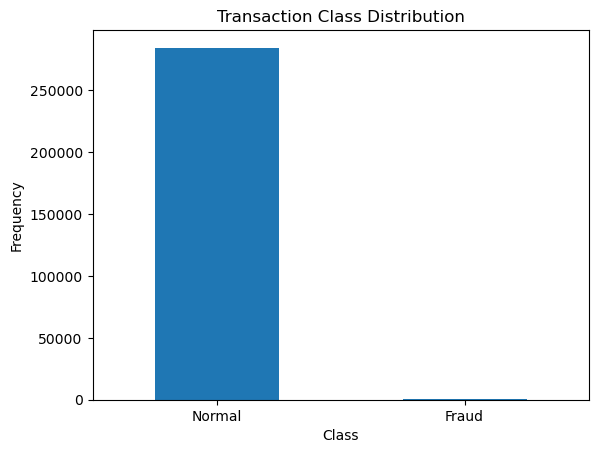

In [7]:
# target data 만들기
label = ["Normal", "Fraud"]

# 284807개의 행에서 정상 비정상 데이터 Class를 통해 구분하기

count_classes = pd.value_counts(df['Class'],sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2),label)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [8]:
# 분류된 갯수 확인
print("Normal_count :", count_classes[0])
print("Fraud_count :", count_classes[1])
print("Normal_shape:", df[df.Class==0].shape)
print("Fraud_shape:", df[df.Class==1].shape)

normal = df[df.Class==0]
frauds = df[df.Class==1]

Normal_count : 284315
Fraud_count : 492
Normal_shape: (284315, 31)
Fraud_shape: (492, 31)


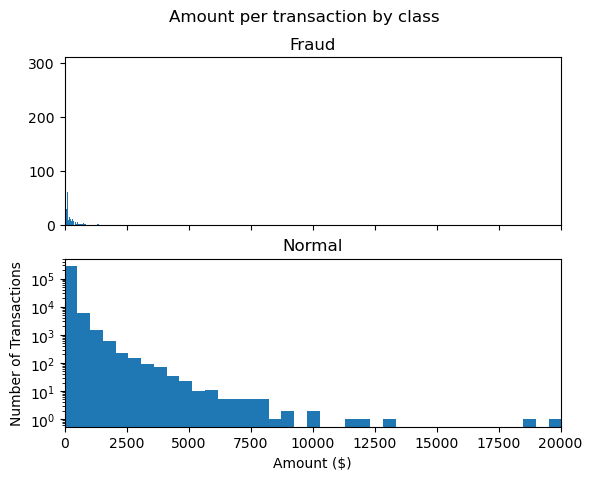

In [9]:
# 정상 비정상 거래 양, 거래 금액 히스토그램으로 시각화
# 비정상 거래가 0~2500$ 사이에서 이루어진다
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')

bins = 50

ax1.hist(frauds.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

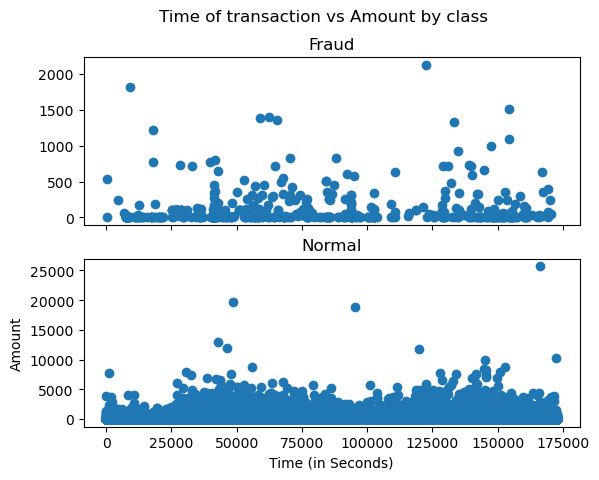

In [10]:
# 거래 시간과 거래 금액 간의 관계를 시각화.
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(frauds.Time, frauds.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = df.drop(['Time'],axis=1)

# 특성 v1~v28은 이미 전처리가 되어있기 때문에 특성["Amount"]에 대해서만 진행
ss = StandardScaler()

# fit_transform 메서드는 2차원 배열을 입력으로 받기 때문에 .values를 통해 넘파이 배열 변환
# reshape함수로 2차원 배열로 만들
data['Amount']=ss.fit_transform(data['Amount'].values.reshape(-1,1))


In [12]:
# 오토인코더는 비지도 학습이므로 정답 레이블이 필요가 없다.
x_train, x_test = train_test_split(data,test_size=0.2,random_state=42)

# 훈련 데이터에서 정상 거래만을 선택
x_train = x_train[x_train.Class==0]
# 훈련 데이터에서 Class 열을 제거하여 오토인코더가 학습할 때 레이블 정보를 사용하지 않도록 함
x_train = x_train.drop(['Class'],axis=1)

# 테스트 데이터의 Class 값을 y_test 로 지정. 테스트 시 사기 거래와 정상 거래 구분하기 위해 사용
y_test = x_test['Class']

# 테스트 데이터에서 Class 열을 제거해서 오토인코더가 레이블 없이 데이터를 복원할 수 있도록 준비
x_test = x_test.drop(['Class'],axis=1)

x_train = x_train.values
x_test = x_test.values

x_train.shape

(227451, 29)

## 2. **AE 정의 및 학습**

In [14]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

input_dim = x_train.shape[1]
encoding_dim = 14

input_layer = Input(shape=(input_dim, ))
encoded = Dense(encoding_dim, activation ='relu')(input_layer)
encoded = Dense(int(encoding_dim/2),activation='relu')(encoded)
decoded = Dense(int(encoding_dim/2),activation='relu')(encoded)
decoded = Dense(input_dim,activation='relu')(decoded)

autoencoder = Model(inputs=input_layer, outputs = decoded)
autoencoder.compile(optimizer='adam',loss='mean_squared_error') #분류가 아니므로 mse로 진행
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense (Dense)               (None, 14)                420       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 29)                232       
                                                                 
Total params: 813
Trainable params: 813
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = autoencoder.fit(x_train,x_train, epochs=50,batch_size=256, shuffle=True, validation_split=0.1)
     

Epoch 1/50
800/800 [==============================] - 3s 3ms/step - loss: 0.9389 - val_loss: 0.7956
Epoch 2/50
800/800 [==============================] - 2s 3ms/step - loss: 0.7756 - val_loss: 0.7406
Epoch 3/50
800/800 [==============================] - 2s 3ms/step - loss: 0.7425 - val_loss: 0.7233
Epoch 4/50
800/800 [==============================] - 2s 2ms/step - loss: 0.7303 - val_loss: 0.7144
Epoch 5/50
800/800 [==============================] - 2s 2ms/step - loss: 0.7240 - val_loss: 0.7087
Epoch 6/50
800/800 [==============================] - 2s 2ms/step - loss: 0.7194 - val_loss: 0.7057
Epoch 7/50
800/800 [==============================] - 2s 2ms/step - loss: 0.7159 - val_loss: 0.7018
Epoch 8/50
800/800 [==============================] - 2s 2ms/step - loss: 0.7136 - val_loss: 0.7003
Epoch 9/50
800/800 [==============================] - 2s 3ms/step - loss: 0.7120 - val_loss: 0.6985
Epoch 10/50
800/800 [==============================] - 3s 3ms/step - loss: 0.7091 - val_loss: 0.6955

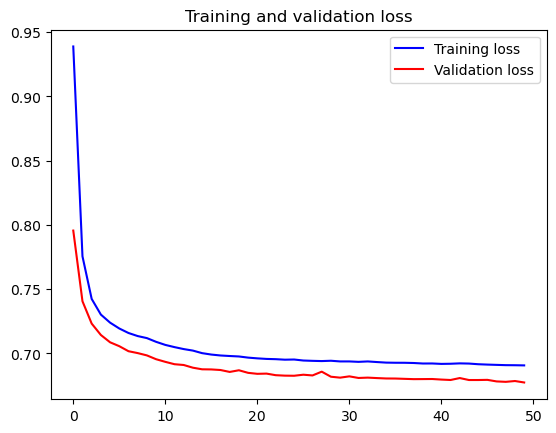

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs,loss,'b',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [17]:
# 오토인코더를 사용한 이상 탐지에서, 재구성 오류(Reconstruction Error)는 입력 데이터가
# 얼마나 잘 복원되었는지 측정하는 값
# 이를 통해 정상 데이터와 비정상 데이터를 구분할 수 있다.
# 재구성 오류 값은 test-predic 의 제곱의 평균인 MSE 로 나타내어 표기한다.

predictions = autoencoder.predict(x_test)
mse = np.mean(np.power(x_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

1781/1781 [==============================] - 3s 2ms/step


,reconstruction_error,true_class
count,56962.000000,56962.000000
mean,0.727187,0.001720
std,3.276009,0.041443
min,0.050670,0.000000
25%,0.239363,0.000000
50%,0.385781,0.000000
75%,0.611723,0.000000
max,245.314599,1.000000


In [18]:
error_df.head()

,reconstruction_error,true_class
43428,78.036447,1
49906,0.870603,0
29474,0.250484,0
276481,0.377318,0
278846,0.166327,0


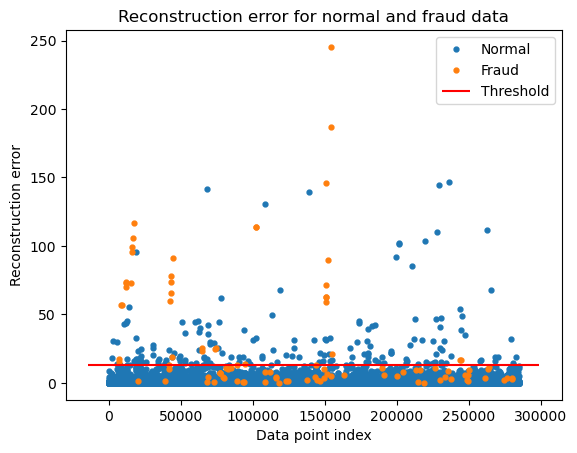

In [19]:
threshold = 13

groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name,group in groups :
  ax.plot(group.index, group.reconstruction_error,marker='o',ms=3.5, linestyle='',
          label = "Fraud" if name == 1 else "Normal")

ax.hlines(threshold,ax.get_xlim()[0],ax.get_xlim()[1],colors='r',zorder=100,label='Threshold')
ax.legend()
plt.title("Reconstruction error for normal and fraud data")
plt.xlabel("Data point index")
plt.ylabel("Reconstruction error")
plt.show()

Precision (정밀도): 정밀도는 모델이 Positive 클래스로 예측한 샘플 중에서 실제로 Positive인 샘플의 비율

Recall (재현율): 재현율은 실제 Positive 샘플 중에서 모델이 Positive으로 올바르게 예측한 비율

F1-Score: F1-Score는 정밀도와 재현율의 조화 평균. 즉, 정밀도와 재현율의 균형을 고려한 지표로, 두 값이 비슷할 때 높은 값을 가진다.

Accuracy (정확도): 정확도는 전체 샘플 중에서 모델이 올바르게 예측한 샘플의 비율

Macro Avg (매크로 평균): 클래스 간의 비율에 관계없이 단순 평균을 낸 값

Weighted Avg (가중 평균): 클래스 비율에 따라 가중치를 부여한 평균

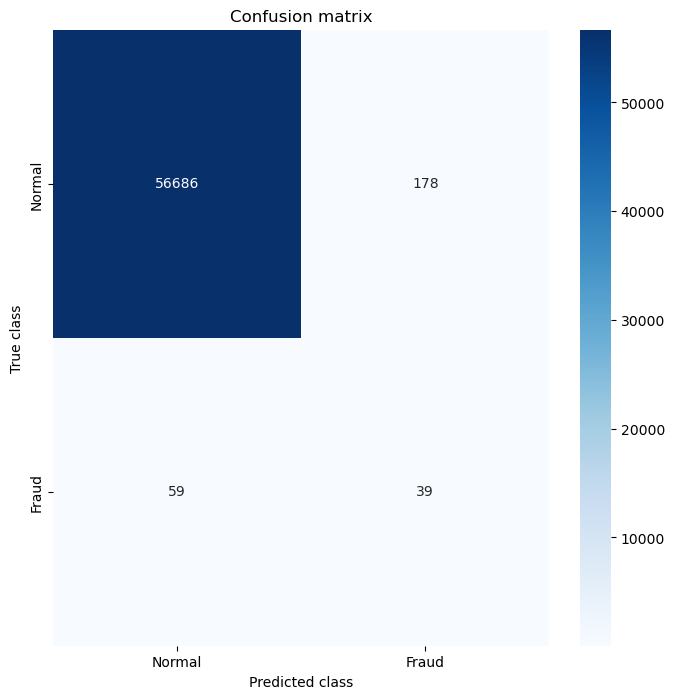

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.18      0.40      0.25        98

    accuracy                           1.00     56962
   macro avg       0.59      0.70      0.62     56962
weighted avg       1.00      1.00      1.00     56962



In [20]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=label, yticklabels=label, annot=True, fmt="d",cmap="Blues")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))